In [54]:
# import numpy as np
# import pandas as pd
# import keras
# import os
# from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
# from sklearn.model_selection import train_test_split
# from keras.utils import load_img, img_to_array, to_categorical
from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
# from matplotlib import pyplot as plt
# from sklearn.preprocessing import LabelBinarizer
# from PIL import Image

# Convolutional Neural Network

# Importing the libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf

In [55]:
# label, data = [], []

# for class_name in os.listdir('dataset/DATASET/TRAIN'):
#     for path in os.listdir(f"dataset/DATASET/TRAIN/{class_name}"):
#         img_path = os.path.join('dataset', 'DATASET', 'TRAIN', class_name, path)
#         image = load_img(img_path, target_size=(224, 224))
#         image = img_to_array(image)
#         image = preprocess_input(image)

#         data.append(image)
#         label.append(class_name)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_batches = train_datagen.flow_from_directory(r'C:\Users\Cendekia Luthfieta N\Wayang Predict\DATASET\TRAIN', target_size = (64, 64), batch_size = 32,
                                                  classes=['Abimanyu', 'Antasena', 'Arjuna', 'Bagong', 'Bima', 'Cepot', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Kresna', 'Nakula', 'Petruk', 'Semar', 'Yudhistira'])

valid_datagen = ImageDataGenerator(rescale = 1./255)
valid_batches = valid_datagen.flow_from_directory(r'C:\Users\Cendekia Luthfieta N\Wayang Predict\DATASET\TEST', target_size = (64, 64), batch_size = 32,
                                                classes=['Abimanyu', 'Antasena', 'Arjuna', 'Bagong', 'Bima', 'Cepot', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Kresna', 'Nakula', 'Petruk', 'Semar', 'Yudhistira'])


Found 1120 images belonging to 14 classes.
Found 280 images belonging to 14 classes.


In [56]:
imgs, labels = next(train_batches)

In [57]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

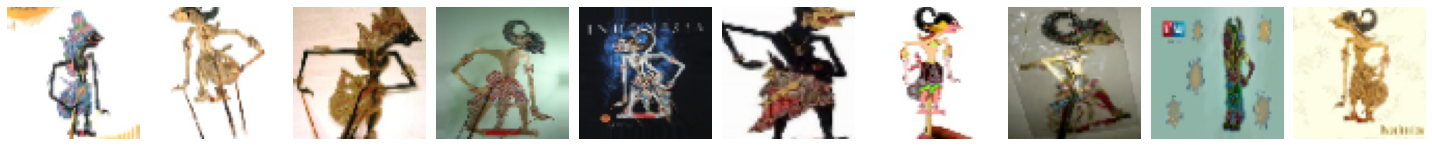

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

In [58]:
plotImages(imgs)
print(labels)

In [59]:
# plt.imshow(image)
# print(image)

In [60]:
# category = list(set(label))

In [61]:
# for idx, val in enumerate(category):
#     print(f"{idx} : {val}")

In [62]:
# for idx, val in enumerate(category):
#     for idx2, val2 in enumerate(label):
#         if val2 == val:
#             label[idx2] = idx

In [63]:
# # lb = LabelBinarizer()
# # label = lb.fit_transform(label)
# # label = to_categorical(label)

# data = np.array(data, dtype='float32')
# label = np.array(label)

# label

In [64]:
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, label, stratify=label, random_state=42, test_size=.2)

In [65]:
# generator = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
# 	zoom_range=0.2,
# 	width_shift_range=0.2,
# 	height_shift_range=0.2,
# 	shear_range=0.2,
# 	horizontal_flip=True,
# 	fill_mode="nearest"
# )

In [74]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=14, activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='categorical_crossentropy', metrics='accuracy')

In [75]:
# base_model = VGG16(
#     weights='imagenet',
#     include_top=False,
#     input_tensor=Input(shape=(224, 224, 3)),
#     input_shape=(224, 224, 3)
# )

In [76]:
# base_model.summary()
r=cnn.fit(x = train_batches, validation_data = valid_batches, epochs = 200)

Epoch 1/200
35/35 [==============================] - 2s 66ms/step - loss: 2.6351 - accuracy: 0.0848 - val_loss: 2.5956 - val_accuracy: 0.0964
Epoch 2/200
35/35 [==============================] - 2s 63ms/step - loss: 2.5074 - accuracy: 0.1688 - val_loss: 2.4195 - val_accuracy: 0.1571
Epoch 3/200
35/35 [==============================] - 2s 60ms/step - loss: 2.3260 - accuracy: 0.2313 - val_loss: 2.3217 - val_accuracy: 0.2464
Epoch 4/200
35/35 [==============================] - 2s 62ms/step - loss: 2.0911 - accuracy: 0.3089 - val_loss: 2.1927 - val_accuracy: 0.2714
Epoch 5/200
35/35 [==============================] - 2s 61ms/step - loss: 1.9416 - accuracy: 0.3750 - val_loss: 1.9521 - val_accuracy: 0.3464
Epoch 6/200
35/35 [==============================] - 2s 60ms/step - loss: 1.7964 - accuracy: 0.3929 - val_loss: 1.9288 - val_accuracy: 0.3821
Epoch 7/200
35/35 [==============================] - 2s 62ms/step - loss: 1.6954 - accuracy: 0.4536 - val_loss: 1.7553 - val_accuracy: 0.4393
Epoch 

35/35 [==============================] - 2s 62ms/step - loss: 0.3220 - accuracy: 0.9036 - val_loss: 1.5900 - val_accuracy: 0.6464
Epoch 59/200
35/35 [==============================] - 2s 62ms/step - loss: 0.3204 - accuracy: 0.8938 - val_loss: 1.6244 - val_accuracy: 0.6571
Epoch 60/200
35/35 [==============================] - 2s 65ms/step - loss: 0.3714 - accuracy: 0.8795 - val_loss: 1.7203 - val_accuracy: 0.6214
Epoch 61/200
35/35 [==============================] - 2s 64ms/step - loss: 0.3040 - accuracy: 0.9000 - val_loss: 1.7883 - val_accuracy: 0.6250
Epoch 62/200
35/35 [==============================] - 2s 64ms/step - loss: 0.3594 - accuracy: 0.8813 - val_loss: 1.6466 - val_accuracy: 0.6536
Epoch 63/200
35/35 [==============================] - 2s 66ms/step - loss: 0.3214 - accuracy: 0.9009 - val_loss: 1.7464 - val_accuracy: 0.6321
Epoch 64/200
35/35 [==============================] - 2s 66ms/step - loss: 0.3034 - accuracy: 0.9062 - val_loss: 1.6910 - val_accuracy: 0.6393
Epoch 65/200

Epoch 115/200
35/35 [==============================] - 3s 75ms/step - loss: 0.1846 - accuracy: 0.9446 - val_loss: 2.2441 - val_accuracy: 0.6500
Epoch 116/200
35/35 [==============================] - 2s 70ms/step - loss: 0.1472 - accuracy: 0.9598 - val_loss: 2.1395 - val_accuracy: 0.6607
Epoch 117/200
35/35 [==============================] - 2s 69ms/step - loss: 0.1497 - accuracy: 0.9500 - val_loss: 2.1146 - val_accuracy: 0.6679
Epoch 118/200
35/35 [==============================] - 2s 64ms/step - loss: 0.1543 - accuracy: 0.9491 - val_loss: 2.1629 - val_accuracy: 0.6714
Epoch 119/200
35/35 [==============================] - 2s 64ms/step - loss: 0.1580 - accuracy: 0.9491 - val_loss: 2.0979 - val_accuracy: 0.6714
Epoch 120/200
35/35 [==============================] - 2s 62ms/step - loss: 0.1477 - accuracy: 0.9527 - val_loss: 2.2182 - val_accuracy: 0.6857
Epoch 121/200
35/35 [==============================] - 2s 63ms/step - loss: 0.1294 - accuracy: 0.9580 - val_loss: 2.2986 - val_accuracy:

35/35 [==============================] - 2s 65ms/step - loss: 0.1098 - accuracy: 0.9634 - val_loss: 2.6148 - val_accuracy: 0.6393
Epoch 172/200
35/35 [==============================] - 2s 62ms/step - loss: 0.1035 - accuracy: 0.9705 - val_loss: 2.6375 - val_accuracy: 0.6393
Epoch 173/200
35/35 [==============================] - 2s 62ms/step - loss: 0.1136 - accuracy: 0.9643 - val_loss: 2.3917 - val_accuracy: 0.6679
Epoch 174/200
35/35 [==============================] - 2s 62ms/step - loss: 0.1058 - accuracy: 0.9607 - val_loss: 2.5516 - val_accuracy: 0.6464
Epoch 175/200
35/35 [==============================] - 2s 62ms/step - loss: 0.1071 - accuracy: 0.9634 - val_loss: 2.6268 - val_accuracy: 0.6357
Epoch 176/200
35/35 [==============================] - 2s 62ms/step - loss: 0.1144 - accuracy: 0.9732 - val_loss: 2.5297 - val_accuracy: 0.6429
Epoch 177/200
35/35 [==============================] - 2s 66ms/step - loss: 0.0810 - accuracy: 0.9768 - val_loss: 2.6169 - val_accuracy: 0.6357
Epoch 

In [77]:
# base_model.trainable = False
# test_imgs, test_labels = next(test_batches)

In [13]:
# model = Sequential([
#     base_model,
#     Conv2D(16, (3, 3), activation='relu'),
#     MaxPooling2D(strides=1),

#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(strides=1),

#     Flatten(),
#     Dense(896, activation='relu'),
#     Dense(448, activation='relu'),
#     Dense(224, activation='relu'),
#     Dense(112, activation='relu'),
#     Dense(56, activation='relu'),
#     Dense(28, activation='relu'),
#     Dense(14, activation='softmax')
# ])

In [14]:
# model.build((None, 224, 224, 3))
# model.compile(metrics='accuracy', loss='sparse_categorical_crossentropy', optimizer='adam')

In [78]:
# model.summary()

In [79]:
# iterator = generator.flow(Xtrain, Ytrain, batch_size=64)
# test_ = generator.flow_from_directory('dataset/DATASET/TEST', target_size=(250, 250), class_mode='categorical', batch_size=64)

In [80]:
# H = model.fit(
#     iterator,
#     epochs=5,
#     # steps_per_epoch=20,
#     validation_data=(Xtest, Ytest),
#     # validation_data=test_,
#     validation_steps=len(Xtest) // 64
# )

In [81]:
# test_


In [ ]:
# len(Ytest, Xtest) // 64